In [2]:
#!git clone https://github.com/HiroshiKERA/monomial-agnostic-vanishing-ideal.git

In [3]:
# import os
# path = '/content/monomial-agnostic-vanishing-ideal/'

# os.chdir(path)
# !ls
# !pip install scikit-learn
!pip --version

pip 23.0.1 from /home/bosg/Documents/py-envs/vii/lib/python3.11/site-packages/pip (python 3.11)


In [4]:
import sys
sys.path.append('..')
# sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


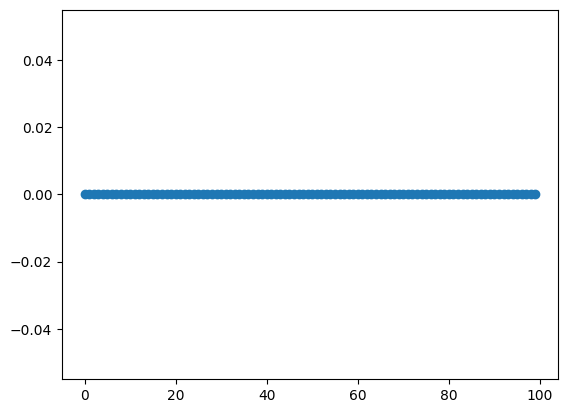

[[ 0  0]
 [ 1  0]
 [ 2  0]
 [ 3  0]
 [ 4  0]
 [ 5  0]
 [ 6  0]
 [ 7  0]
 [ 8  0]
 [ 9  0]
 [10  0]
 [11  0]
 [12  0]
 [13  0]
 [14  0]
 [15  0]
 [16  0]
 [17  0]
 [18  0]
 [19  0]
 [20  0]
 [21  0]
 [22  0]
 [23  0]
 [24  0]
 [25  0]
 [26  0]
 [27  0]
 [28  0]
 [29  0]
 [30  0]
 [31  0]
 [32  0]
 [33  0]
 [34  0]
 [35  0]
 [36  0]
 [37  0]
 [38  0]
 [39  0]
 [40  0]
 [41  0]
 [42  0]
 [43  0]
 [44  0]
 [45  0]
 [46  0]
 [47  0]
 [48  0]
 [49  0]
 [50  0]
 [51  0]
 [52  0]
 [53  0]
 [54  0]
 [55  0]
 [56  0]
 [57  0]
 [58  0]
 [59  0]
 [60  0]
 [61  0]
 [62  0]
 [63  0]
 [64  0]
 [65  0]
 [66  0]
 [67  0]
 [68  0]
 [69  0]
 [70  0]
 [71  0]
 [72  0]
 [73  0]
 [74  0]
 [75  0]
 [76  0]
 [77  0]
 [78  0]
 [79  0]
 [80  0]
 [81  0]
 [82  0]
 [83  0]
 [84  0]
 [85  0]
 [86  0]
 [87  0]
 [88  0]
 [89  0]
 [90  0]
 [91  0]
 [92  0]
 [93  0]
 [94  0]
 [95  0]
 [96  0]
 [97  0]
 [98  0]
 [99  0]]


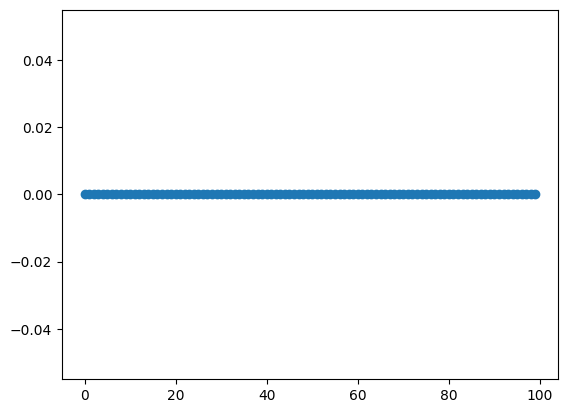

In [5]:
npts = 3890
theta = [np.pi*i/(npts/2) for i in range(npts)]
# circle
X = np.vstack((np.cos(theta), np.sin(theta))).T

from sklearn import preprocessing
# print(sk.__version__)


xs = np.linspace(-1, 1, 100)
ys = np.linspace(2, 3, 100)

xs = [i for i in range(100)]
ys = [i**2 for i in xs]
ys = [0 for i in xs]
# noise = 1 + 0 * np.linspace(-1, 1, 100)
print(xs)
# y = x^2 
# X = np.vstack((xs, xs**2)).T
# X = np.vstack((xs, ys, xs+ys)).T
X = np.vstack((xs, ys)).T

# X = np.vstack((xs, ys)).T
plt.plot(X[:,0], X[:,1], "o")
plt.show()
# print(X)
# X = preprocessing.normalize(X, axis=0)
print(X)

# print(type(X[0,0]))
# 1/0
# X = np.vstack((xs, xs**2, noise)).T
# plt.plot(X[:,0], X[:,1], "o", color='red')
plt.plot(X[:,0], X[:,1], "o")
# plt.scatter(X[:,0], X[:,1], X[:,2], "o")

In [6]:
vi = VanishingIdeal()
# vi.fit(X, 0.01, method="grad")
# vi.fit(X, 0.01, method="grad", max_degree=3)
vi.fit(X, 0.01, method="grad", max_degree=2)
# vi.fit(data, 0.01, method="grad", max_degree=2)
vi.basis[0]

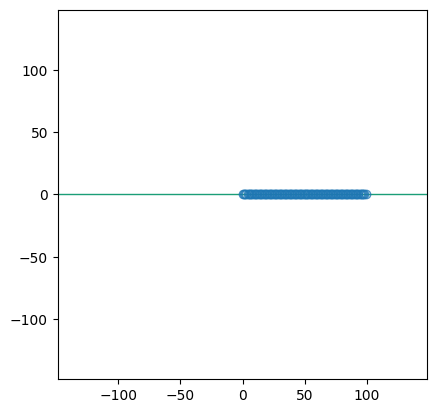

vanishing polynomial #0


Eq(1.0*y, 0)

In [10]:
import sympy as sp
from sympy.abc import x, y, z, w, u
X_symb = np.array([[x, y]])
# X_symb = np.array([[x, y, z, w]])
# all_symbs = [x, y, z, w, u][:data.shape[1]]
# print(X.shape)
X_symb = np.array([[x, y, z, w, u][0:X.shape[1]]])
# print(X_symb)

G = vi.evaluate(X_symb, target='vanishing')  # (1, 6) array
G = np.ravel(G)

# print(type(G[0]))
# print(G[1])
vi.plot(X, splitshow=True)
# vi.plot(X)
# G
# simpl_disp(G[0])

from IPython.display import display
for i, g in enumerate(G):
    print(f'vanishing polynomial #{i}')
    # display(g)
    g = sp.expand(g)
    # display(g)
    display(simpl_disp(g)[0])
    # print(g)
    print('')


In [8]:
def round_expr(expr, num_digits):  # author: https://stackoverflow.com/a/48491897
    return expr.xreplace({n : round(n, num_digits) for n in expr.atoms(sp.Number)})

def simpl_disp(expr):
    smds = sp.Add.make_args(expr)
    # display(smds)
    # li[0] < 1e-10
    li = [sp.Mul.make_args(smd)[0] for smd in smds]
    # display(li)
    # li = [(abs(smd) > 1e-10) for smd in li]
    li = [smds[i] for i, smd in enumerate(li) if (abs(smd) > 1e-10)]
    # li = [smd for smd in li ]
# li = [f'{smd:e}' for smd in li]
    expr = sum([round_expr(smd, 3) for smd in li]) 
    eq = sp.Eq(expr, 0)
    # display(li)
    # display(expr)
    # display(eq)
    return eq, expr

display(simpl_disp(g)[0])

Eq(1.0*y, 0)